# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.
***
## 1. Описание задания.
1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
    * обработку пропусков в данных;
    * кодирование категориальных признаков;
    * масштабирование данных.

## 2. Выполнение работы.

Перед началом работы подключаем необходимые библиотеки:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Обработка пропусков данных.
Для обработки пропуска заднных выберем подходящий датасет.

In [20]:
data = pd.read_csv('country_vaccinations.csv', sep=",")

Данный датасет содержит данные о прогрессе вакцинации в разных странах.

In [17]:
data.shape

(11156, 15)

Проверим, есть ли пропуски, которые мы могли бы устранить:

In [18]:
data.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     4510
people_vaccinated                      5169
people_fully_vaccinated                6872
daily_vaccinations_raw                 5590
daily_vaccinations                      196
total_vaccinations_per_hundred         4510
people_vaccinated_per_hundred          5169
people_fully_vaccinated_per_hundred    6872
daily_vaccinations_per_million          196
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [22]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


Судя по полученным сведениям, датасет имеет множество пропусков, которые необходимо устранить.

#### Удаление и заполнение нулями.

In [23]:
# Удаление колонок, содержащих пустые значения
data_del_1 = data.dropna(axis=1, how='any')
(data.shape, data_del_1.shape)

((11156, 15), (11156, 6))

In [24]:
# Удаление строк, содержащих пустые значения
data_del_2 = data.dropna(axis=0, how='any')
(data.shape, data_del_2.shape)

((11156, 15), (3837, 15))

In [25]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
data_new_3.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


#### Внедрение значений - импьютация
Все колонки числовые, поэтому просто составим их список и определим количество пустых значений:

In [29]:
nul_cols = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred']
total_count = data.shape[0]
for col in nul_cols:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0:
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка total_vaccinations. Тип данных float64. Количество пустых значений 4510, 40.43%.
Колонка people_vaccinated. Тип данных float64. Количество пустых значений 5169, 46.33%.
Колонка people_fully_vaccinated. Тип данных float64. Количество пустых значений 6872, 61.6%.
Колонка daily_vaccinations_raw. Тип данных float64. Количество пустых значений 5590, 50.11%.
Колонка daily_vaccinations. Тип данных float64. Количество пустых значений 196, 1.76%.
Колонка total_vaccinations_per_hundred. Тип данных float64. Количество пустых значений 4510, 40.43%.
Колонка people_vaccinated_per_hundred. Тип данных float64. Количество пустых значений 5169, 46.33%.


In [32]:
# Фильтр по колонкам с пропущенными значениями
data_nul = data[nul_cols]
data_nul

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred
0,0.0,0.0,NaN,NaN,NaN,0.00,0.00
1,NaN,NaN,NaN,NaN,1367.0,NaN,NaN
2,NaN,NaN,NaN,NaN,1367.0,NaN,NaN
3,NaN,NaN,NaN,NaN,1367.0,NaN,NaN
4,NaN,NaN,NaN,NaN,1367.0,NaN,NaN
...,...,...,...,...,...,...,...
11151,162633.0,139133.0,23500.0,17123.0,10967.0,1.09,0.94
11152,179417.0,153238.0,26179.0,16784.0,12505.0,1.21,1.03
11153,193677.0,166543.0,27134.0,14260.0,12624.0,1.30,1.12
11154,206205.0,178237.0,27968.0,12528.0,11636.0,1.39,1.20


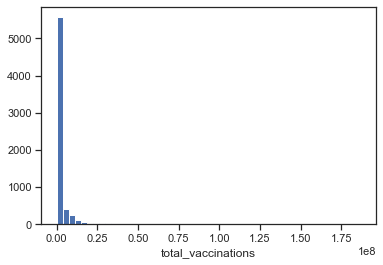

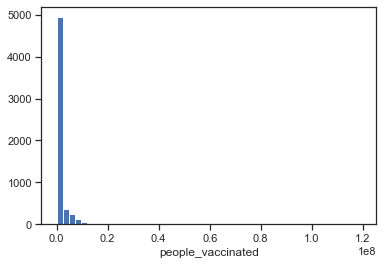

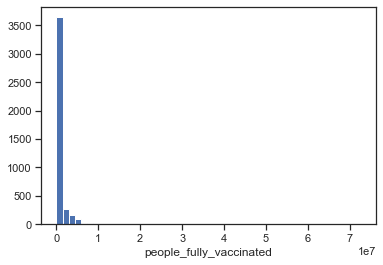

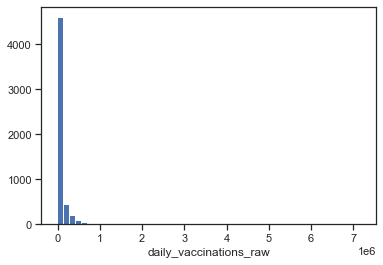

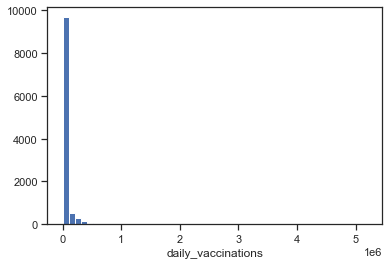

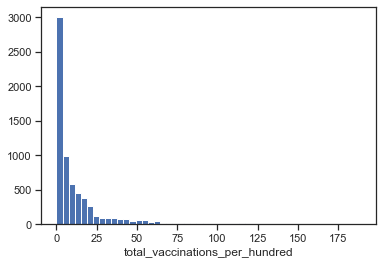

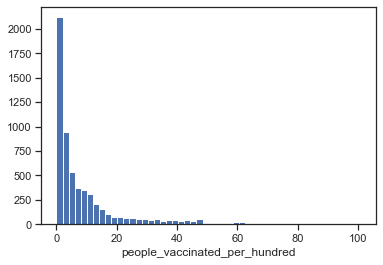

In [33]:
# Гистограмма по признакам
for col in data_nul:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Можно использовать встроенные средства импьютации библиотеки scikit-learn:

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

Выберем один из столбцов:

In [43]:
data_nul_PeopleVaccinatedPerHundred = data_nul[['people_vaccinated_per_hundred']]
data_nul_PeopleVaccinatedPerHundred.head()

,people_vaccinated_per_hundred
0,0.0
1,NaN
2,NaN
3,NaN
4,NaN


In [45]:
# Фильтр для проверки заполнения пустых значений для одного из столбцов
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_nul_PeopleVaccinatedPerHundred)
mask_missing_values_only

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

Далее используем функцию SimpleImputer с использованием различных показателей центра распределения (среднее значение, медиана, наиболее часто встречающееся значение).

In [61]:
strategies=['mean', 'median', 'most_frequent']
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_nul_imp = imp_num.fit_transform(data_nul_PeopleVaccinatedPerHundred)
    return data_nul_imp[mask_missing_values_only]

In [62]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([9.35741607, 9.35741607, 9.35741607, ..., 9.35741607, 9.35741607,
        9.35741607]))

In [63]:
strategies[1], test_num_impute(strategies[1])

('median', array([3.81, 3.81, 3.81, ..., 3.81, 3.81, 3.81]))

### Обработка пропусков данных.
Для обработки пропуска заднных выберем подходящий датасет.

In [65]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([0., 0., 0., ..., 0., 0., 0.]))